In [30]:
#TECHNOCOLABS FINAL PROJECT.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score



In [31]:
# create a DataFrame
df = pd.read_csv('Life Expectancy Data.csv')
df.head(5)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [32]:
df.shape





(2938, 22)

In [33]:
df.columns




Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [35]:

df.isnull().sum(axis=0)




Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [36]:
# deleting the null values
before_drop = df.shape[0]
df = df.dropna()
after_drop = df.shape[0]


In [37]:
print('rows before droping nulls:', before_drop)
print('rows after droping nulls:', after_drop)


rows before droping nulls: 2938
rows after droping nulls: 1649


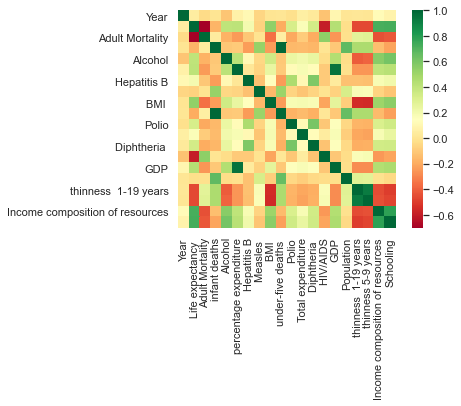

In [38]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [64]:
y = df['Life expectancy '].values
X_gdp = df['GDP'].values

In [66]:
print('Dimension of y before reshaping:{}'.format(y.shape))
print('Dimension of x before reshaping :{}'.format(X_gdp.shape))

Dimension of y before reshaping:(1649,)
Dimension of x before reshaping :(1649,)


In [67]:
y=y.reshape(-1,1)
X_gdp=X_gdp.reshape(-1,1)

In [68]:
print('Dimension of y after reshaping :{}'.format(y.shape))
print('Dimension of X after reshaping:{}'.format(X_gdp.shape))

Dimension of y after reshaping :(1649, 1)
Dimension of X after reshaping:(1649, 1)


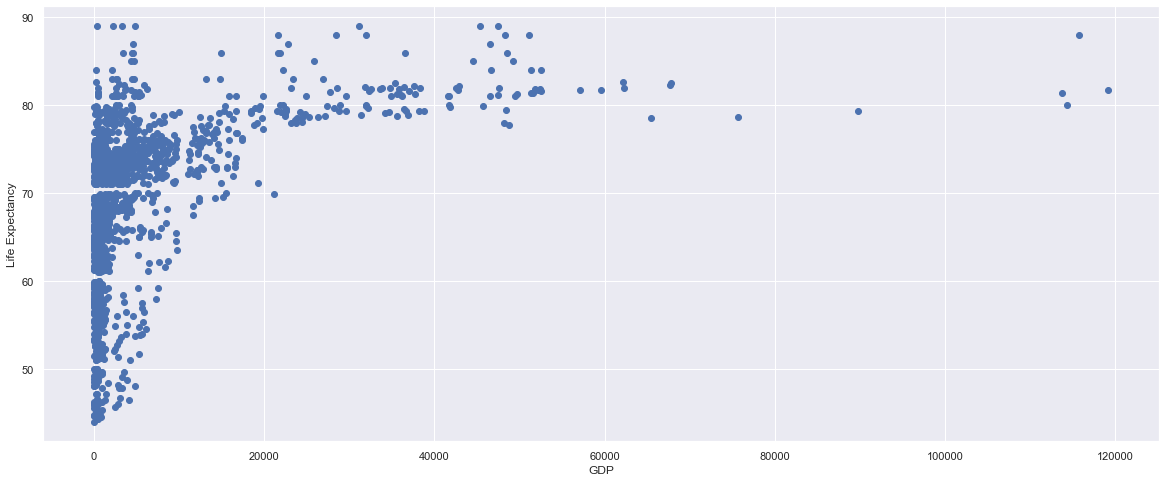

In [69]:
# scatter plot of y vs X_gdp
plt.figure(figsize=(20,8))
plt.scatter(X_gdp, y)

plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

In [70]:
# creating the model
ln_reg = LinearRegression()

In [71]:
# introduce the new x
predicition_space= np.linspace(min(X_gdp),max(X_gdp)).reshape(-1,1)



In [72]:
# fitting the data
ln_reg.fit(X_gdp,y)


LinearRegression()

In [73]:
# prediciting the levels for new  x
y_pred= ln_reg.predict(predicition_space)

In [75]:
#print R^2
print(ln_reg.score(predicition_space,y_pred))

1.0


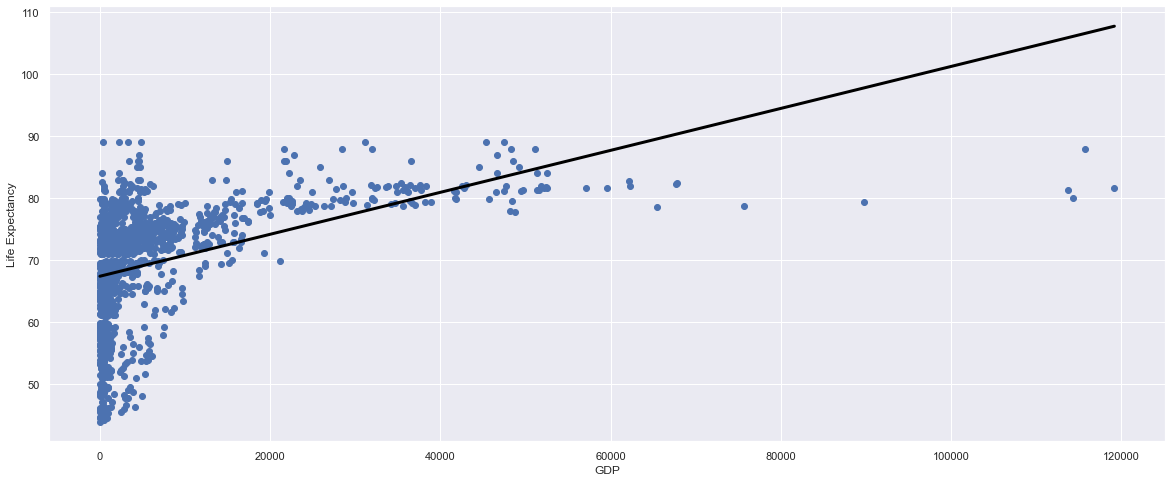

In [76]:
# plotting th eregression line on original data
plt.figure(figsize=(20,8))
plt.scatter(X_gdp, y)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)

plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()


In [77]:
#Linear Regression on all features



In [78]:
# deleting the non numeric values
df = df.drop(['Country','Year','Status'], axis=1)



In [79]:
df.head()


,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [80]:
# labels(y) and data(X_all)
y = df['Life expectancy '].values
X_all = df.drop(['Life expectancy '], axis=1).values


In [81]:

# splitting the data to train and test parts
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.3, random_state=42)


In [82]:

# create the model
ln_reg_all = LinearRegression()


In [83]:

# fitting the model to the train data
ln_reg_all.fit(X_train, y_train)


LinearRegression()

In [84]:

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


LinearRegression(n_jobs=1)

In [85]:

# predicting the data
y_pred = ln_reg_all.predict(X_test)


In [86]:
# accuracy
print('R^2: {}'.format(ln_reg_all.score(X_test, y_test)))
print('rmse: {}'.format(np.sqrt(mean_squared_error(y_pred, y_test))))


R^2: 0.8260950560447283
rmse: 3.706513589005562


In [87]:

y = df['Life expectancy '].values
X_all = df.drop(['Life expectancy '], axis=1).values


In [88]:

X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.3, random_state=42)


In [89]:

cv_reg = LinearRegression()

In [90]:
cv_list = np.array([3,4,5,6,7,8,9])

for cv in cv_list:
    cv_scores = cross_val_score(cv_reg, X_all, y, cv=cv)
    print(cv_scores)
    print('Average ' + str(cv) + '-Fold CV Score is: {}'.format(np.mean(cv_scores)))
    print()

[0.82427072 0.82372506 0.78087243]
Average 3-Fold CV Score is: 0.8096227359724774

[0.8430908  0.74407898 0.82133086 0.77444936]
Average 4-Fold CV Score is: 0.795737500403733

[0.83532928 0.77805879 0.83898485 0.70770205 0.78634137]
Average 5-Fold CV Score is: 0.7892832697283414

[0.81735793 0.82143188 0.77577538 0.84463851 0.66140695 0.83198793]
Average 6-Fold CV Score is: 0.7920997646412635

[0.80933202 0.86613602 0.75362869 0.83710821 0.75510939 0.77061355
 0.81228645]
Average 7-Fold CV Score is: 0.8006020481110573

[0.78342688 0.87973022 0.71515519 0.77379143 0.85760046 0.72701262
 0.76504128 0.80386685]
Average 8-Fold CV Score is: 0.7882031162649559

[0.79141407 0.85407169 0.69457591 0.80109074 0.8200655  0.79415007
 0.63193609 0.78059906 0.80506281]
Average 9-Fold CV Score is: 0.7747739921797666



In [91]:

y = df['Life expectancy '].values
X_all = df.drop(['Life expectancy '], axis=1).values


In [92]:

# create Lasso model
reg_lasso = Lasso(alpha=0.4, normalize=True)


In [93]:


reg_lasso.fit(X_all, y)


Lasso(alpha=0.4, normalize=True)

In [95]:

# finding the coefficionts of Lasso
lasso_coef = reg_lasso.fit(X_all, y).coef_
print(lasso_coef)



[-0. -0.  0.  0.  0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0.  0.]


In [96]:

# create a list of columns except of (Life expactancy)
df_columns = ['Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']


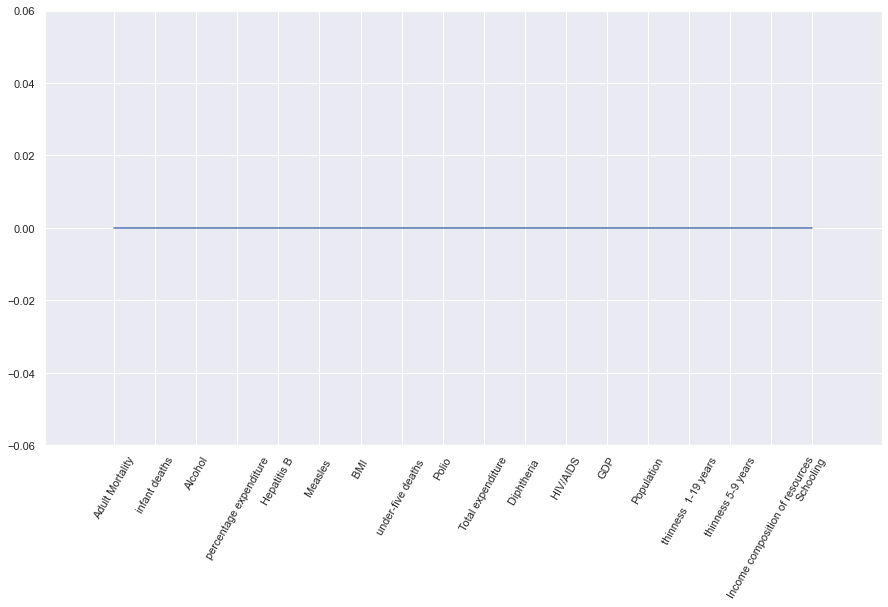

In [97]:

# ploting the Lasso coefficients
plt.figure(figsize=(15,8))
plt.plot(range(len(df_columns)), lasso_coef)

plt.xticks(range(len(df_columns)), df_columns, rotation=60)
plt.margins(0.1)
plt.show()


In [98]:

# function for displaying plots
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)
    
    std_error = cv_scores_std / np.sqrt(10)
    
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='red')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()


In [99]:

y = df['Life expectancy '].values
X_all = df.drop(['Life expectancy '], axis=1).values


In [100]:

# list of alphas
alpha_space = np.logspace(-4,0,50)
ridge_scores = []
ridge_scores_std = []


In [101]:

# create Ridge regressor
ridge_reg = Ridge(normalize=True)


In [102]:

# itteration on different alphas
for alpha in alpha_space:
    ridge_reg.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge_reg, X_all, y, cv=10)
    
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))


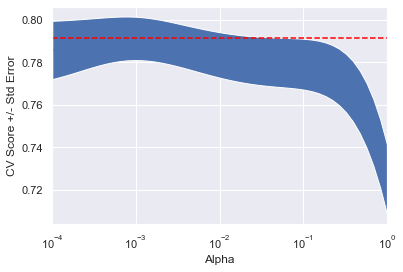

In [103]:

# display the plot
display_plot(ridge_scores, ridge_scores_std)


